<h1>Computer Vision MOOC. Chapter I. Basics</h1>
<h2>Structures, transformations and basic algorithms</h2>

<h2>Introduction to Computer Vision</h2>

Artificial vision or computer vision is a scientific field which involves different methods for acquiring, processing, analising and understanding real world images by a computer. In the same way as human brain interprets the surrounding world, artificial vision makes possible to understand the world for a computer. This process is achieved through different scientific fields such as geometry, statistics, physics among others. Images are acquired from diffente sources such as mobile phones, video cameras, medical imaging, etc.


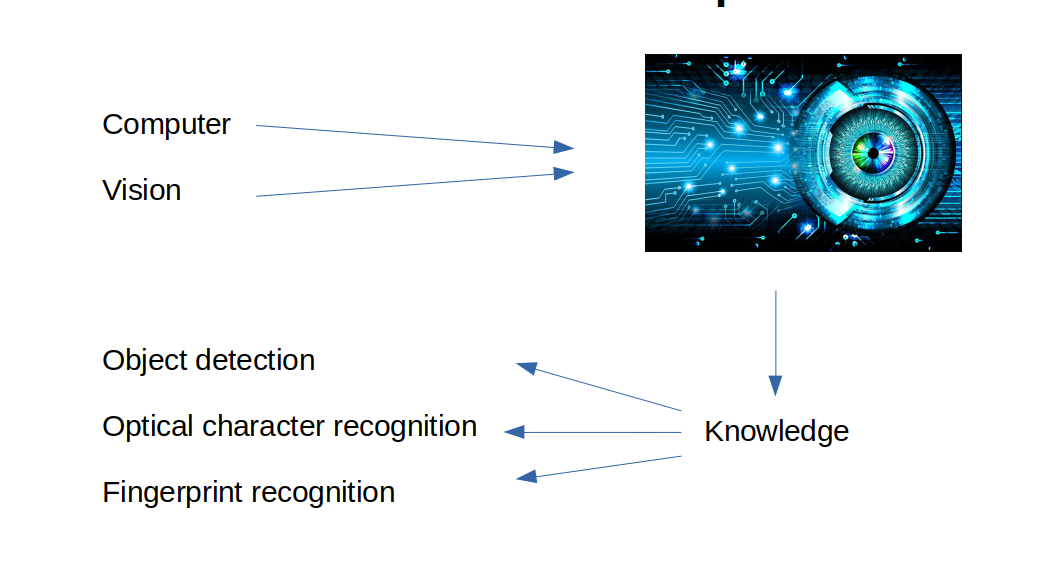

<h2>Human eye signal perception</h2>

The human eye is an organ that reacts to light and allows vision. Rod and cone cells in the retina allow conscious light perception and vision including color differentiation and the perception of depth. The human eye can differentiate between about 10 million colors and is possibly capable of detecting a single photon. The eye is part of the sensory nervous system. (Wikipedia)

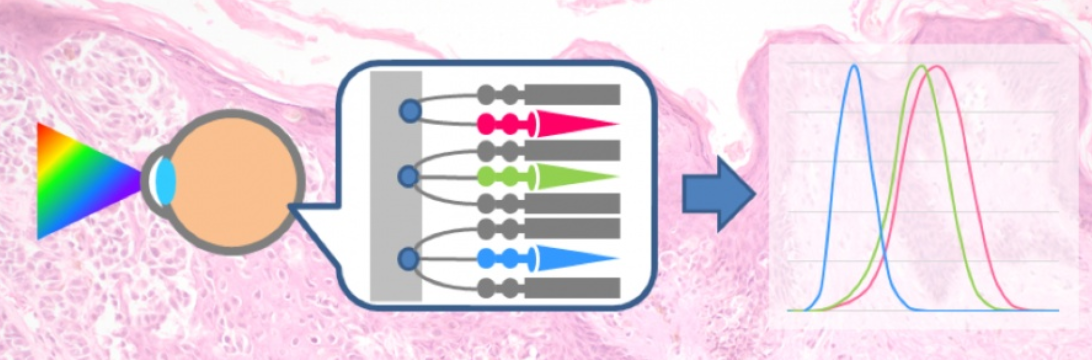

<h2>How do computers interpret an image?</h2>

A computer does not understand an image in the same way as human does, instead, a computer treat this kind of signal as a numeric matrix with certain width and height. This matrix contains numbers or cells commonly known as pixels, which is the minimum information represented. As you can see in the next image, we have a 12x16 pixels image of Abraham Lincoln. Each one of these pixels represent a numeric value between 0 and 255. This is known as grayscale, where 0 represents black and 255 white, while the intermediate values are considered different kind of gray colours.



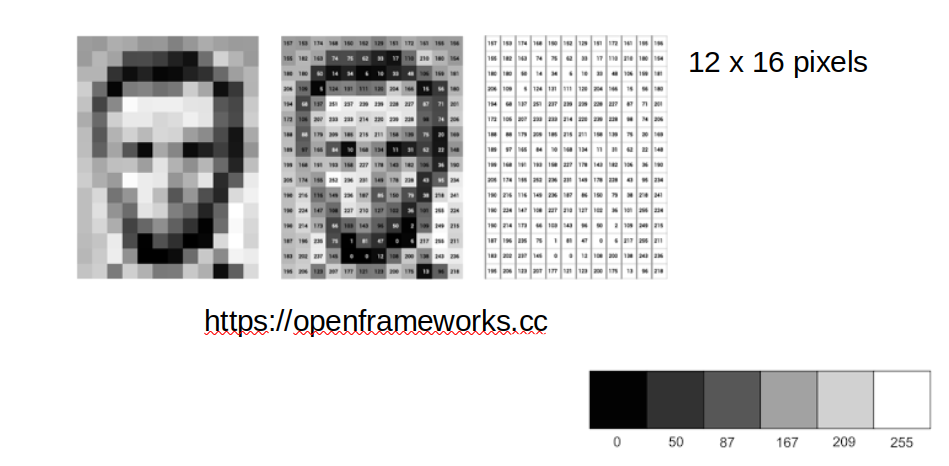

<h2>How do computers interpret colour images?</h2>

Dealing with colour images is similar to gray ones (see above mentioned example). In this case, each image is formed by three array or matrix, each one representing the primary colours: red, blue, and green. This is commonly known as RGB space.

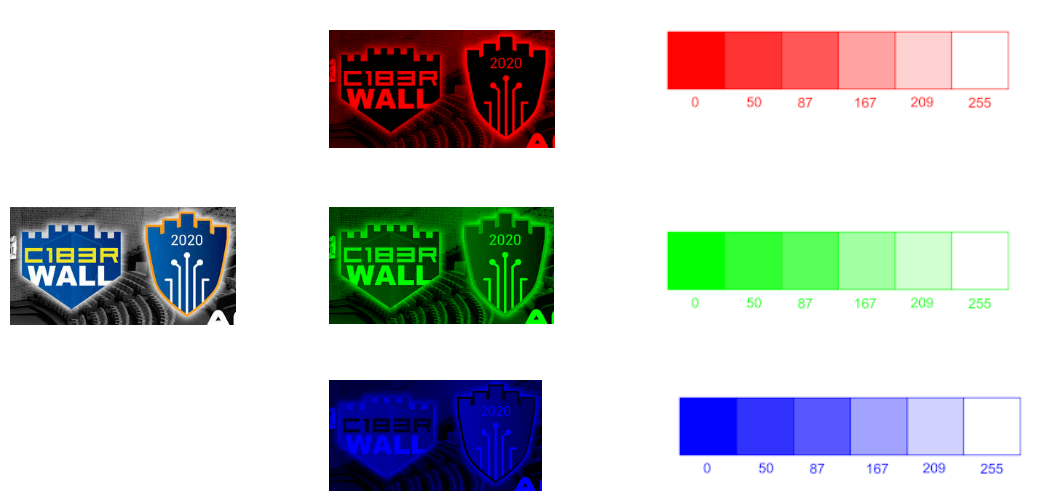

<h2>OpenCV for Beginners</h2>

This part of the course is focused on getting started about the basics of image processing. We are going to learn the most common used image processing operations using Python along with the OpenCV library.

OpenCV is a free Artificial Vision library originally developed by Intel. OpenCV is the acronim of Open Computer Vision. It appeared in 1999, and it has been used in a wide number of applications until 2020, which is considered the most popular Artificial Vision library. Different kind of applications can be created with OpenCV such as movement detection, object recognition, 3d reconstruction, among others.

The first step is to install OpenCV in our environment:

In [1]:
!python -m pip install opencv-python

  Using cached https://files.pythonhosted.org/packages/f6/ca/33ef6ffe0f6f7a825febdbf655c192f30d0f59d40f23b647d08a1c2a26c5/opencv_python-4.2.0.32-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/3a/5f/47e578b3ae79e2624e205445ab77a1848acdaa2929a00eeef6b16eaaeb20/numpy-1.16.6-cp27-cp27mu-manylinux1_x86_64.whl


<h2>Loading and displaying an image</h2>

Once we have the library installed in our system, the next step is to load and show a simple image.

In [12]:
# import the opencv package
import cv2
# Next step is to load an image
image = cv2.imread("./Lenna.jpg")
print(repr(image.shape))

# And finally we are going to test the load of the image showing it in our computer screen
# Press a key on our keyboard to continue execution
cv2.imshow("Image", image)
cv2.waitKey(0)

AttributeError: 'NoneType' object has no attribute 'shape'

equations should be here, but they should be written in a special language, etc.
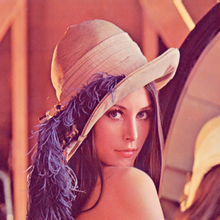

In [ ]:
#Some python code here to execute something we have just explained before

Some images should be here as well to explain what we are going to do ...

### Initial configurations ###

Before starting, set the correct python scripts in path. Do not forget to set the correct path in the windows variable, and set it where python is.

In [ ]:
!echo %path%

Then, upgrade pip install, as we will further need it to install the components

In [ ]:
!python -m pip install --upgrade pip --user

In [ ]:
!python -m pip install opencv-python matplotlib

### Load images with OpenCV and change color spaces ###

In [ ]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

img = cv2.imread('Lenna.png', 1)
row,col,ch= img.shape
img2 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
g = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
#for notebook plotting purposes. Otherwise this step is not needed
g2 = cv2.merge([g,g,g])
print(repr(g2.shape))

plt.imshow(img)
plt.title('original')
plt.show()

plt.imshow(img2)
plt.title('original2')
plt.show()

plt.imshow(g)
plt.title('my picture')
plt.show()

plt.imshow(g2)
plt.title('my picture')
plt.show()
# code to do it in your c / c++ project
#cv2.imshow('Original image',img)
#cv2.imshow('Gray image', gray)

### Contrast and brighness manipulation ###

The contrast is as simple as scaling the images and the brightness is just adding a value to the whole set of image values.

In [ ]:
im5 = img2
im6 = img2
# This can be done with opencv functions
# C++ function can be just convertTo
# Define contrast factor
cont = 0.5
# Define brightness adjustment
bri = 150
# Apply to the images
im5 = cv2.convertScaleAbs(im5, -1, cont, 0)
im6 = cv2.convertScaleAbs(im6, -1, 1, bri)

# Plot results. Start with contrast modification
# show the histogram to see the effects on the image
plt.imshow(im5)
plt.title(str(cont) + ' contrast. No brigthness')
plt.show()
plt.hist(img2.ravel(),256,[0,256]); plt.show()
plt.hist(im5.ravel(), 256,[0,256]);plt.show()
# then continue to the brightness modification.
# show the histogram to see the effects on the image
plt.imshow(im6)
plt.title('no contrast. ' + str(bri) + ' brightness')
plt.show()
plt.hist(im6.ravel(),256,[0,256]);plt.show()

It can be seen in the last histogram that the values above 255-'bri' are all saturated to 255, which is the maximum possible white of the uint range.
For the case of the contrast manipulation, the image gets darker. it is because the average value of the image (which is the average brightness of the image) is scaled the same factor as the one applied with the brighness.

### Transformations: Crop ###

There are two ways of doing the cropping in openCV. The c++ version does the transformation using the following code:

In [ ]:
# extract a 100x100 pixel square ROI (Region of Interest) from the
# input image starting at x=100,y=80 at ending at x=150,y=170
# The function accepts (x,y,width, height)
# cv::Rect roi = cv::Rect(100,80,150-100,170-80);
# croppedImage = image(roi);

In the python version of OpenCV it is a bit easier as it directly uses numpy library, so the transformations are the same as it is regularly done with a matrix in this library.

In [ ]:
roi = img2[80:170, 100:150, :]
plt.imshow(roi)
plt.title('cropped image')
plt.show()

### Transformations: Scale ###

This transformation transforms the image size into another image size.
This transformation implies an interpolation.

In [ ]:
# In this example, we reduce the image to 120x120x3 instead of 220x220x3
# It will be seen in the lateral of the result plot, in the numbers
# that gives the size
resized = cv2.resize(img2, (120,120))
plt.imshow(resized)
plt.title('resized image')
plt.show()

### Transformations: Rotation ###

This transformation converts the image to another one in which the pixel positions are varied according to a given angle or rotation kernel.

In [ ]:
# First the rotation matrix is created, given a center of rotation,
# and the angle to rotate the image. Don't forget we are working in v,u,
# coordinates, which starts in the 0,0 of the reference, then v goes from
# top to bottom and u from left to right
# The second parameter is the rotation angle in degrees
# The third parameter is the scale factor, which we do not need it for now
rMat = cv2.getRotationMatrix2D((row/2, col/2), 180, 1.0)
# As we have the rotation matrix defined we apply the transformation
# given by this matrix.
rotated = cv2.warpAffine(img2, rMat, (col, row))
plt.imshow(rotated)
plt.title('rotated image')
plt.show()

### In Image drawing ###

In order to better debug algorithms o see detections when some algorithms are applied, drawing on the image is useful.
A basic function which is very handy in this cases is rectangle

In [ ]:
cloned = img2.copy()
cv2.rectangle(cloned, (100, 80), (150, 170), (0, 255, 0), 6)
plt.imshow(cloned)
plt.title('image including rectangle')
plt.show()

### Convolution ###

Convolutions are a way of doing a bidimensional match. A kernel in which a bidimensional pattern is defined to be found and the convolution will yield a big value in case it founds something similar to that pattern on the image

In [ ]:
k = np.array([[0.5,-1,0.5],[0.5,-1,0.5],[0.5,-1,0.5]])
opencvOutputGray = cv2.filter2D(g, -1, k)
plt.imshow(cv2.merge([opencvOutputGray, opencvOutputGray, opencvOutputGray]))
plt.title('gray image after convolution')
plt.show()

### Noise removal. Filtering ###

In order to remove noise from the image some predefined filters using convolutions can be applied
First we now add some noise to the original image and then the de-noise is applied to check it is smoothed

In [ ]:

print('image shape ' + repr(img2.shape))
mean = 0
var = 25
sigma = var**0.5
gauss = np.random.normal(mean,sigma,(row,col,ch))
#print(repr(gauss))
print('noise shape ' + repr(gauss.shape))
gauss = gauss.reshape(row,col,ch)
gauss8 = gauss.astype(np.uint8)
noisy = img2 + gauss8
#print(repr(noisy))
plt.imshow(noisy)
plt.title('noisy image')
plt.show()

and now, we filter the image with a gaussian noise to remove it.

In [ ]:
blur = cv2.GaussianBlur(noisy,(5,5),0)
plt.imshow(blur)
plt.title('gaussian filter applied to noisy image')
plt.show()

### Image gradient extraction. Edge detection ###

Gradients are then evaluated to extract borders
The borders are extracted as high variations in some direction.
The gradient module is computed as follows:
\begin{equation*}
G=\sqrt{G_{x}^{2} + G_{y}^{2}}
\end{equation*}
And the angle as follows:
\begin{equation*}
\Theta = \arctan{G_y,G_x}
\end{equation*}

In [ ]:
laplacian = cv2.Laplacian(img,cv2.CV_8U)
sobelx = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_8U,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

With the gradients computed we can aggregate them as in G and then they can be thresholded in order to better extract the borders.
The threshold can be done using a fixed value or it can be done adaptively.
One way to do it with an adaptive value is using the Canny border detection algorithm which performs gradient computation, filtering and then adaptative thresholding.

In [ ]:
im3 = cv2.Canny(g2, 170, 200)
im4 = cv2.merge([im3,im3,im3])

plt.imshow(im4)
plt.title('canny borders')
plt.show()